# Sequenziamento del DNA con l'Intelligenza Artificiale

In questo progetto vogliamo mostrare come si può utilizzare il Machine Learning, una branca dell'Intelligenza Artificiale (AI/IA), per il sequenziamento del DNA.


## 🧬 Cos'è il Sequenziamento del DNA?  
Il sequenziamento del DNA è il processo di determinazione dell'ordine esatto degli acidi nucleici (A, T, C, G) in una molecola di DNA. Gli scienziati utilizzano il sequenziamento per studiare i geni, individuare malattie e comprendere il funzionamento della vita a livello molecolare. [1]

![DNA](img/dna.png)


## 🤖 In che modo il Machine Learning può aiutare?  
Il Machine Learning consente di riconoscere schemi nelle sequenze di nucleotidi, aiutando in compiti come l'identificazione di mutazioni genetiche o la classificazione degli organismi.

In questo progetto vogliamo classificare una sequenza di acidi nucleici in una delle seguenti sette categorie:

- Recettori accoppiati a proteine G: rilevano segnali dall'esterno della cellula, come ormoni o molecole odorose, e attivano risposte interne tramite proteine G. Sono coinvolti in funzioni come visione, olfatto e metabolismo.
- Tirosin-chinasi: enzimi che aggiungono un gruppo fosfato a una tirosina in una proteina, regolando crescita, divisione e comunicazione cellulare.
- Proteina tirosina fosfatasi: enzimi che rimuovono il gruppo fosfato da una tirosina, spegnendo segnali attivati dalle tirosin-chinasi e mantenendo l'equilibrio cellulare.
- Sintetasi: enzimi che formano molecole complesse da molecole semplici attraverso ATP.
- Sintasi: simile alla sintetasi, ma costruisce molecole senza richiedere energia da ATP.
- Canale ionico: proteine che permettono il passaggio di ioni (come sodio, potassio o calcio) attraverso la membrana cellulare, regolando trasmissione nervosa e contrazione muscolare.
- Fattore di trascrizione: proteine che si legano al DNA per controllare l'attivazione o la repressione di geni, influenzando crescita, sviluppo e risposta allo stress.


## 📚 Cosa imparerai  
Esploreremo:  
1. Analisi dei dati: comprendere le sequenze di DNA e prepararle per il machine learning.  
2. Conteggio dei $k$-meri: suddividere le sequenze di DNA in piccoli frammenti sovrapposti ($k$-meri) per l’estrazione delle caratteristiche (feature) e contare la loro occorrenza.
3. Rappresentazione Bag-of-Words: convertire le sequenze di DNA in un formato numerico comprensibile da un'AI. 
4. Addestramento e validazione del modello: insegnare all'intelligenza artificiale a classificare correttamente sequenze di acidi nucleici.

## 👨🏻‍💻 Tecnologie utilizzate
Le principali tecnologie utilizzate sono:

- [Python](https://www.python.org): un linguaggio di programmazione versatile e potente.
- [Pandas](https://pandas.pydata.org): utile per la manipolazione e l'analisi dei dati, in particolare per la gestione di strutture come tabelle.
- [Matplotlib](https://matplotlib.org): utile per creare grafici e visualizzazioni di dati in Python.
- [Scikit-learn](https://scikit-learn.org/stable/): fornisce metodi semplici ed efficienti per l'analisi dei dati e la creazione di modelli di AI.
- [NumPy](https://numpy.org): uno strumento per il calcolo numerico che supporta operazioni matematiche ad alte prestazioni.
- [Seaborn](https://seaborn.pydata.org): uno strumento per la visualizzazione statistica dei dati che aiuta a creare grafici informativi.

## 🧐 Analisi dei dati

I dati che utilizzeremo possono essere trovati liberamente su internet, ad esempio su [Kaggle](https://www.kaggle.com) [3][4]. In genere, questi dati sono etichettati (cioè categorizzati) da esperti del dominio, come genetisti, biologi o medici. Questo processo di annotazione è fondamentale perché permette all'AI di apprendere dai dati in modo corretto e di migliorare la propria capacità di riconoscere e classificare nuove informazioni.

Per prima cosa analizziamo la distribuzioni delle classi molecolari (etichette) del nostro insieme di dati a disposizione. Questa prima fase preliminare ci consente di scegliere le migliori tecniche per costruire un'intelligenza artificiale efficiente. [2]

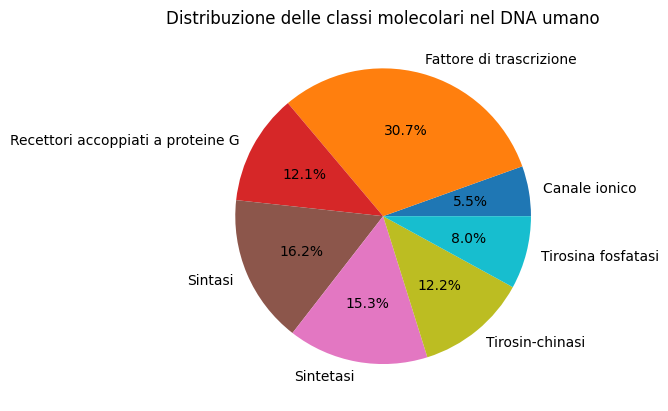

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carica il file di dati
human_dna = pd.read_table('../data/raw/human.txt')

# Crea un dizionario per mappare le classi numeriche alle descrizioni
class_mapping = {
    0: 'Recettori accoppiati a proteine G',
    1: 'Tirosin-chinasi',
    2: 'Tirosina fosfatasi',
    3: 'Sintetasi',
    4: 'Sintasi',
    5: 'Canale ionico',
    6: 'Fattore di trascrizione'
}

# Mappa le classi numeriche alle descrizioni nella colonna 'class'
human_dna['class_description'] = human_dna['class'].map(class_mapping)

# Conta i valori per ciascuna classe
class_counts = human_dna['class_description'].value_counts()

# Mappa dei colori per il diagramma a torta utilizzando 'tab10'
colors = plt.colormaps['tab10'](np.linspace(0, 1, len(class_counts)))

# Disegna il diagramma a torta
class_counts.sort_index().plot.pie(
    autopct='%1.1f%%',  # Percentuale visualizzata
    ylabel='',          # Rimuove l'etichetta dell'asse Y
    colors=colors       # Applica la mappa di colori
)

# Titolo del grafico
plt.title("Distribuzione delle classi molecolari nel DNA umano")
plt.show()

In [2]:
import pandas as pd

# Carica il file di dati
human_dna = pd.read_table('../data/raw/human.txt')

# Mappa le classi numeriche alle descrizioni nella colonna 'Class'
human_dna['class_description'] = human_dna['class'].map(class_mapping)

# Mostra la tabella aggiornata (solo le colonne di interesse)
human_dna[['sequence', 'class_description']]

,sequence,class_description
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,Sintasi
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,Sintasi
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,Sintetasi
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,Sintetasi
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,Sintetasi
...,...,...
4375,ATGGAAGATTTGGAGGAAACATTATTTGAAGAATTTGAAAACTATT...,Recettori accoppiati a proteine G
4376,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...,Fattore di trascrizione
4377,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...,Fattore di trascrizione
4378,ATGGGGCACCTGGTTTGCTGTCTGTGTGGCAAGTGGGCCAGTTACC...,Fattore di trascrizione


## 🧬 Estrarre caratteristiche da sequenze di DNA

I modelli di AI funzionano con numeri, ma le sequenze di DNA sono fatte di basi azotate. Dobbiamo quindi trasformare queste sequenze in un formato che l'AI possa capire. Una tecnica semplice che funziona bene è basata sul conteggio dei $k$-meri, che consiste nei seguenti passi [3]:

1. Determinare i $k$-meri di una sequenza di DNA.
2. Utilizzare la tecnica Bag of words (BoW) per calcolare la loro frequenza in ciascuna sequenza di DNA.

### 🔢 Come determinare i $k$-meri di una sequenza di DNA?

Per spiegare come determinare i $k$-meri di una sequenza di DNA, consideriamo il seguente esempio con una sequenza di DNA: ACGAGGTACGA [5]

![DNA](img/kmers.png)

Il valore di $k$ "ottimale", ovvero quello che potrebbe portare ad un buon modello di intelligenza artificiale in grado di classificare correttamente le sequenze di DNA, va scelto tramite approcci empirici, cioè facendo esperimenti.

In [3]:
import pandas as pd

def get_kmers(sequence, k):
    kmers = []
    for i in range(len(sequence) - k + 1):
        kmers.append(sequence[i:i + k])
    return kmers

def join_kmers(kmers):
    return ' '.join(kmers)

# Estrai i k-mers per ogni sequenza
k = 6
human_dna['k-mers'] = human_dna.apply(lambda x: get_kmers(x['sequence'], k), axis=1)

# Unisci i k-mers in una singola stringa per ogni riga
human_dna['k-mers'] = human_dna['k-mers'].apply(join_kmers)

# Riordina le colonne per avere 'joined-kmers' come prima e 'class' come seconda
human_dna = human_dna[['k-mers', 'class', 'class_description']]

# Stampa il DataFrame risultante
human_dna[['k-mers', 'class_description']]

,k-mers,class_description
0,ATGCCC TGCCCC GCCCCA CCCCAA CCCAAC CCAACT CAAC...,Sintasi
1,ATGAAC TGAACG GAACGA AACGAA ACGAAA CGAAAA GAAA...,Sintasi
2,ATGTGT TGTGTG GTGTGG TGTGGC GTGGCA TGGCAT GGCA...,Sintetasi
3,ATGTGT TGTGTG GTGTGG TGTGGC GTGGCA TGGCAT GGCA...,Sintetasi
4,ATGCAA TGCAAC GCAACA CAACAG AACAGC ACAGCA CAGC...,Sintetasi
...,...,...
4375,ATGGAA TGGAAG GGAAGA GAAGAT AAGATT AGATTT GATT...,Recettori accoppiati a proteine G
4376,ATGCAG TGCAGT GCAGTC CAGTCC AGTCCT GTCCTT TCCT...,Fattore di trascrizione
4377,ATGCAG TGCAGT GCAGTC CAGTCC AGTCCT GTCCTT TCCT...,Fattore di trascrizione
4378,ATGGGG TGGGGC GGGGCA GGGCAC GGCACC GCACCT CACC...,Fattore di trascrizione


### 👜 Utilizzo di Bag of Words

Una volta determinati i $k$-meri, occorre effettuare il loro conteggio. Con questa tecnica contiamo quante volte ogni $k$-mero appare in una sequenza di DNA. Questa tecnica si chiama Bag of Words (letteralmente "borsa di parole") perché è come se inserissimo ciascun $k$-mero in una borsa, e quindi in maniera non ordinata/casuale. Si sta assumendo, in pratica, che la posizione dei $k$-meri non sia rilevante. [3]

Ad esempio, supponiamo di voler contare i $k$-meri di _una_ sequenza di DNA: ACGAGGTACGA [5]

![DNA](img/kmers-counting.png)

Nel caso in cui volessimo contare i $k$-meri di _due o più_ sequenze di DNA, si procede in modo simile:

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Brevi sequenze di DNA
sequenze = ['ATGCCC', 'TGCCCC', 'GCCCCA']

# Utilizzo di CountVectorizer per analizzare gruppi di 4 caratteri (tetrameri)
k = 4
vectorizer = CountVectorizer(ngram_range=(k,k), analyzer='char', lowercase=False)
X = vectorizer.fit_transform(sequenze)
feature_names = vectorizer.get_feature_names_out()

# Creazione di un DataFrame con la matrice
df = pd.DataFrame(X.toarray(), columns=feature_names)

# Aggiunta di una colonna con i nomi delle sequenze
df.insert(0, '', ['Sequenza 1', 'Sequenza 2', 'Sequenza 3'])

print("Supponiamo di avere le seguenti tre sequenze di DNA:")
print(*sequenze, sep=', ')
print("")
print(f"Allora i k-meri per k = {k} sono:")
print(*feature_names, sep=', ')
print("")
print("E Bag of words:")
print("")
print(df.to_string(index=False))

Supponiamo di avere le seguenti tre sequenze di DNA:
ATGCCC, TGCCCC, GCCCCA

Allora i k-meri per k = 4 sono:
ATGC, CCCA, CCCC, GCCC, TGCC

E Bag of words:

            ATGC  CCCA  CCCC  GCCC  TGCC
Sequenza 1     1     0     0     1     1
Sequenza 2     0     0     1     1     1
Sequenza 3     0     1     1     1     0


In [14]:
from sklearn.feature_extraction.text import CountVectorizer

k_mers = human_dna['k-mers']

k = 4
countVectorizer = CountVectorizer(ngram_range=(k,k))

# BoW per il data set
x = countVectorizer.fit_transform(k_mers)

# Etichette (classi) per l'addestramento
y = human_dna.iloc[:, 1].values

print("La Bag of words ha:")
print(f"{x.shape[0]} righe (sequenze di DNA)")
print(f"{x.shape[1]} colonne (k-meri unici, con k = {k})")

La Bag of words ha:
4380 righe (sequenze di DNA)
232414 colonne (k-meri unici, con k = 4)


### 🏋️‍♂️ Addestramento del modello

Il data set di partenza viene partizionato in due sottoinsiemi chiamati [2]:

1. Training set: insieme di dati (ovvero sequenze di DNA ed etichette) utilizzate per l'addestramento del classificatore. Durante questa fase il classificatore si "aggiorna" per diminuire la probabilità di fare errori. Questo viene fatto tramite regole matematiche avanzate.
2. Test set: insieme di dati (ovvero sequenze di DNA ed etichette) che non vengono utilizzate per l'addestramento, ma vengono utilizzate unicamente per testare il classificatore dopo la fase di addestramento.
   
![Training e test set](img/train-vs-test.png)

L'intelligenza artificiale che useremo si chiama classificatore Naïve Bayes: è un modello probabilistico e generativo, ovvero cerca di determinare qual è la classe molecolare che più probabilmente ha generato la sequenza di DNA osservata. Il classificatore prende il nome dal matematico [Thomas Bayes](https://it.wikipedia.org/wiki/Thomas_Bayes) e dall'assunzione "naïve" (ovvero semplificativa) che le caratteristiche estratte da ciascun $k$-mero siano indipendenti tra loro, ignorando la loro posizione all'interno della sequenza di DNA. [3]


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Ottieni gli indici originali
indices = human_dna.index.to_numpy()

# Dividi il dataset mantenendo gli indici
x_train, x_test, y_train, y_test, train_indices, test_indices = train_test_split(
    x, y, indices, test_size=0.2, random_state=42
)

# Controllo che gli insiemi siano disgiunti
if set(train_indices) & set(test_indices):
    raise Exception("Train e test set devono essere disgiunti")

# Addestramento del modello Naive Bayes
classifier = MultinomialNB()
classifier.fit(x_train, y_train)

MultinomialNB()

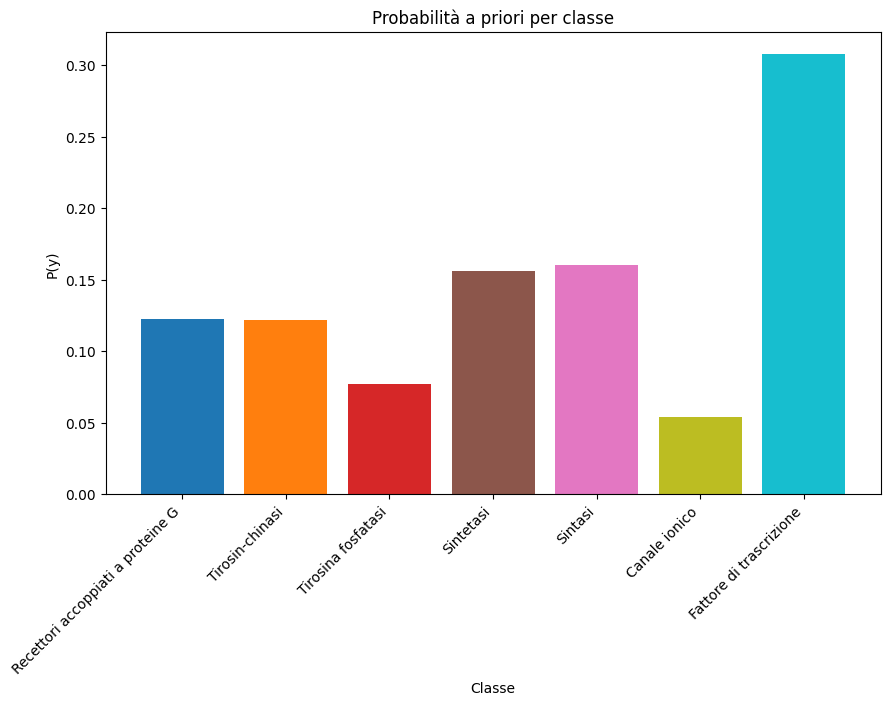

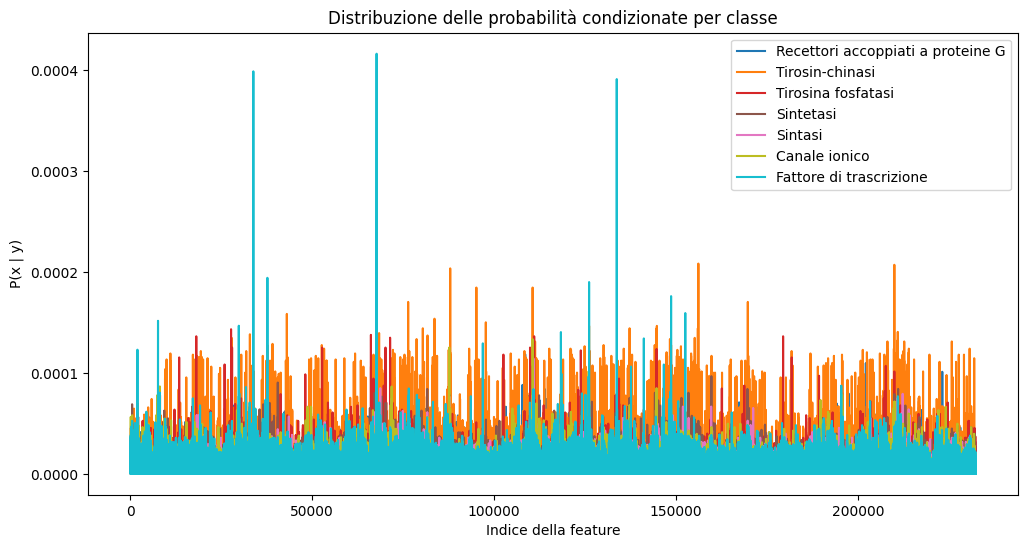

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Estrai le probabilità a priori delle classi
prior_probs = np.exp(classifier.class_log_prior_)

# Mappa dei colori per ogni classe (utilizzando la nuova sintassi)
colors = plt.colormaps['tab10'](np.linspace(0, 1, len(prior_probs)))

# Creazione del grafico a barre per le probabilità a priori
plt.figure(figsize=(10, 6))
bars = plt.bar(class_mapping.values(), prior_probs, color=colors)

# Etichette e titolo
plt.xlabel("Classe")
plt.ylabel("P(y)")
plt.title("Probabilità a priori per classe")

# Ruotare le etichette sull'asse delle ascisse
plt.xticks(rotation=45, ha='right')

# Mostra il grafico
plt.show()

# Estrai le probabilità condizionate delle feature
feature_probs = np.exp(classifier.feature_log_prob_)

# Creazione del grafico a linea per le probabilità condizionate
plt.figure(figsize=(12, 6))
for i in range(feature_probs.shape[0]):
    plt.plot(feature_probs[i], label=class_mapping.get(i, f"Classe {i}"), color=colors[i])

# Etichette e titolo
plt.xlabel("Indice della feature")
plt.ylabel("P(x | y)")
plt.title("Distribuzione delle probabilità condizionate per classe")
plt.legend()


# Mostra il grafico
plt.show()

### 📊 Fase di valutazione del modello

Una volta che la nostra intelligenza artificiale è stata addestrata (sul training set), dobbiamo verificarne quanto è efficace nel fare previsioni su nuove sequenze di DNA che non ha mai visto (ovvero sul test set). [2]

Per farlo, utilizziamo delle misure di valutazione che ci dicono quanto il classificatore è stato bravo ad associare a ciascuna sequenza di DNA la rispettiva classe molecolare. Le metriche più comuni sono [2]:

1. Accuratezza: è il numero di previsioni corrette che il modello ha fatto rispetto al totale delle previsioni.

2. Precisione: ci dice quante delle previsioni fatte dal modello sono corrette.

3. Richiamo: ci dice quante delle sequenze che effettivamente appartengono a una certa classe sono state trovate dal modello. In pratica, quanto il modello è stato bravo a "scoprire" tutte le sequenze della classe giusta.

4. F1: è una misura che cerca di bilanciare precisione e richiamo.

Le prestazioni possono essere visualizzate anche graficamente tramite una tabella chiamata matrice di confusione.

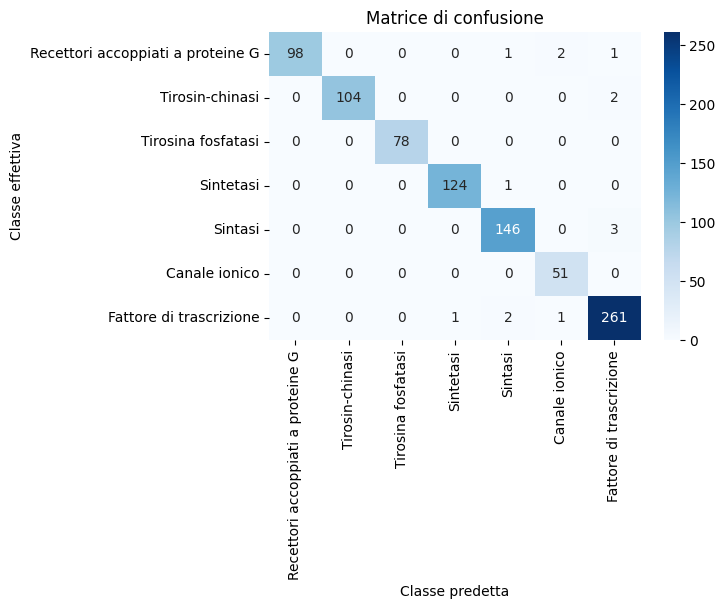

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predizioni sul test set
y_pred = classifier.predict(x_test)

# Calcolare la matrice di confusione
cm = confusion_matrix(y_test, y_pred)

# Creare una mappa di calore per la matrice di confusione
plt.figure(figsize=(6, 4))

# Usare class_mapping per ottenere le etichette stringa per le righe e colonne
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[class_mapping[i] for i in range(len(class_mapping))], 
            yticklabels=[class_mapping[i] for i in range(len(class_mapping))])

# Aggiungere etichette e titolo
plt.xlabel('Classe predetta')
plt.ylabel('Classe effettiva')
plt.title('Matrice di confusione')

# Mostra la mappa di calore
plt.show()

Accuratezza: 98.40%
Precisione: 98.43%
Richiamo: 98.40%
F1: 98.40%


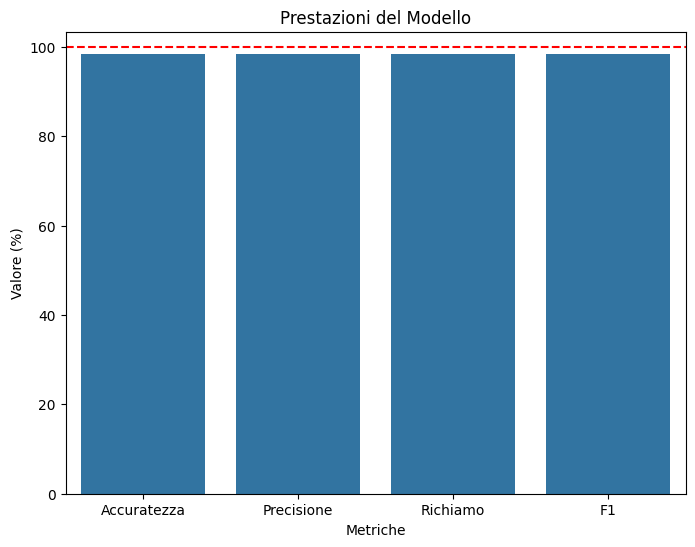

In [9]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Calcolare le metriche
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Stampare i risultati in percentuale
print(f"Accuratezza: {accuracy * 100:.2f}%")
print(f"Precisione: {precision * 100:.2f}%")
print(f"Richiamo: {recall * 100:.2f}%")
print(f"F1: {f1 * 100:.2f}%")

# Creare un dizionario con le metriche
metrics = {'Accuratezza': accuracy * 100, 'Precisione': precision * 100, 'Richiamo': recall * 100, 'F1': f1 * 100}

# Creare un grafico a barre
plt.figure(figsize=(8, 6))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))

# Aggiungere etichette e titoli
plt.xlabel('Metriche')
plt.ylabel('Valore (%)')
plt.title('Prestazioni del Modello')

# Tracciare una linea orizzontale tratteggiata al valore 100
plt.axhline(y=100, color='r', linestyle='--')

# Mostrare il grafico
plt.show()

### 🚀 Qualche esempio di classificazione

In [10]:
# Ottieni il DataFrame con i campioni di test
test_samples = human_dna.loc[test_indices]

for i in range(0, 5):
    print(f"Sequenza: {test_samples.iloc[i]['k-mers'].replace(' ', '')}")
    print(f"AI dice: {class_mapping[y_pred[i]]}")
    print(f"La classe effettiva è: {class_mapping[y_test[i]]}")
    if y_pred[i] != y_test[i]:
        print("L'AI qui ha sbagliato!")
    print("")

Sequenza: ATGGCCTGGCCCGGCCCCGCCCCTCCCCTGCCCTGACCTGAGCTGAGCTGAGCCGAGCCAAGCCAGGCCAGCCCAGCCCAGCCCAGCCCCGCCCCACCCCAGCCCAGGCCAGGGCAGGGAAGGGAGGGGAGGGGAGGAGAGGACAGGACGGGACGAGACGATACGATGCGATGGGATGGTATGGTGTGGTGCGGTGCCGTGCCCTGCCCCGCCCCTCCCCTTCCCTTGCCTTGTCTTGTGTTGTGCTGTGCCGTGCCTTGCCTGGCCTGCCCTGCACTGCACTGCACTGCACTGCACTGGACTGGTCTGGTGTGGTGAGGTGATGTGATGTGATGCGATGCTATGCTTTGCTTGGCTTGGCTTGGTTTGGTTTGGTTTGGTTTGGTTTGGTTTGGTTTGGTGTGGTGGGGTGGCGTGGCATGGCAGGGCAGGGCAGGCCAGGCGAGGCGCGGCGCCGCGCCCCGCCCAGCCCATCCCATGCCATGGCATGGTATGGTGTGGTGAGGTGACGTGACATGACAGGACAGCACAGCACAGCAAAGCAAAGCAAACCAAACCAAACCTAACCTGACCTGTCCTGTCCTGTCTTGTCTTGTCTTCTCTTCACTTCATTTCATTTCATTACATTAAATTAAATTAAAGTAAAGTAAAGTCAAGTCCAGTCCCGTCCCTTCCCTGCCCTGACCTGAGCTGAGGTGAGGAGAGGACAGGACCGGACCAGACCAGACCAGACCAGACCAGACTAGACTGGACTGGACTGGGCTGGGCTGGGCTGGGCTGGGCTGTGCTGTCCTGTCATGTCAGGTCAGGTCAGGACAGGAGAGGAGGGGAGGGGAGGGGAGGGGTGGGGTAGGGTAGGGTAGCGTAGCCTAGCCTAGCCTCGCCTCCCCTCCTCTCCTTTCCTTCCCTTCGCTTCGTTTCGTGTCGTGTCGTGTGGTGTGCTGTGCCGTGCCATGCCAAGCCAAGCCAAGCCAAGCTAAGCTAAGCTAC

# Riepilogo schematico

![DNA](img/schema.png)

# Bibliografia

[1] Silvia Saraceni, Giorgio Strumia. Vita seconda edizione, edizione verde Zanichelli.

[2] [Shalev-Shwartz, Shai, and Shai Ben-David. Understanding machine learning: From theory to algorithms. Cambridge university press, 2014.](https://books.google.it/books?hl=it&lr=&id=Hf6QAwAAQBAJ&oi=fnd&pg=PR15&dq=Shalev-Shwartz,+Shai,+and+Shai+Ben-David.+Understanding+machine+learning:+From+theory+to+algorithms.+Cambridge+university+press,+2014.&ots=2JtiLhiPP8&sig=Oh6i9AxOLmIll1JHrPL0kSoYDRA&redir_esc=y#v=onepage&q=Shalev-Shwartz%2C%20Shai%2C%20and%20Shai%20Ben-David.%20Understanding%20machine%20learning%3A%20From%20theory%20to%20algorithms.%20Cambridge%20university%20press%2C%202014.&f=false)

[3] [Daniel Jurafsky and James H. Martin. 2025. Speech and Language Processing: An Introduction to Natural Language Processing, Computational Linguistics, and Speech Recognition with Language Models, 3rd edition. Online manuscript released January 12, 2025.]( https://web.stanford.edu/~jurafsky/slp3).

[4] [Nagesh Singh Chauhan. 2021/01/15. DNA Sequence Dataset v.1](https://www.kaggle.com/datasets/nageshsingh/dna-sequence-dataset)

[5] [Nagesh Singh Chauhan. 2021/01/15. Demystify DNA Sequencing with Machine Learning v.2](https://www.kaggle.com/code/nageshsingh/demystify-dna-sequencing-with-machine-learning/notebook)

[5] [Gunavaran Brihadiswaran, 2020/07/02. Bioinformatics 1: $k$-mer counting](https://medium.com/swlh/bioinformatics-1-k-mer-counting-8c1283a07e29)



Alessandro Quirile, M.Sc. Computer Scientist. 